In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

api_key = '7ee3dcc9d04c5bf5f50a7ecb54def548'

In [73]:
target_url = "http://api.openweathermap.org/data/2.5/weather??"
cities = ['London', 'Seattle', 'Chicago', 'Paris']




city_name = []
cloudiness = []
countries = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1
set = 1


for city in cities:
    
    try:
        response = requests.get(f'{target_url}&APPID={api_key}&q={city}&units=imperial').json()
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_record = response['name']

        print(f'Processing Record {record} of Set {set} | {city_record}')
        record = record + 1


        if record == 50:
            time.sleep(60)
            record = 0
            set = set + 1
    except:
       print('City not found. Skipping...')


Processing Record 1 of Set 1 | London
Processing Record 2 of Set 1 | Seattle
Processing Record 3 of Set 1 | Chicago
Processing Record 4 of Set 1 | Paris


In [74]:
weather_dict = {'City': city_name, 'Country': countries, 'Cloudiness': cloudiness,  'Date': date, 'Humidity': humidity, 'Latitude': lat, 'Longitude': lng, 'Temperature': max_temp, 'Wind Speed': wind_speed}
weather_df = pd.DataFrame(weather_dict)

weather_df

,City,Country,Cloudiness,Date,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,London,GB,24,1553377710,70,51.51,-0.13,48.99,5.82
1,Seattle,US,40,1553377806,50,47.60,-122.33,60.01,6.93
2,Chicago,US,1,1553377729,37,41.88,-87.62,55.99,5.75
3,Paris,FR,20,1553377572,76,48.86,2.35,51.01,3.36


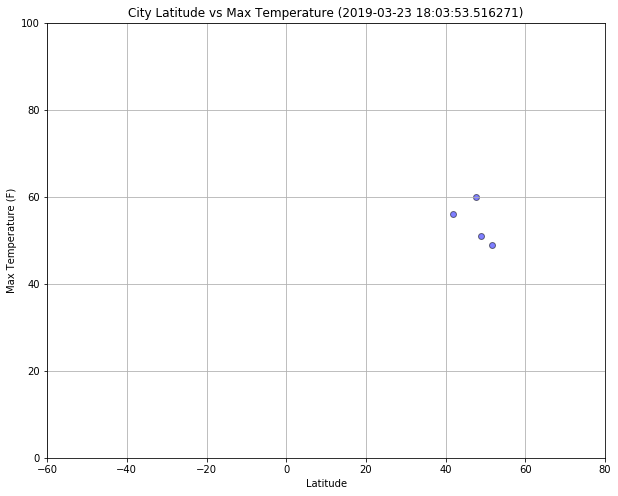

<Figure size 432x288 with 0 Axes>

In [91]:
#plot latitude vs temperature

plt.figure(figsize=(10,8))
plt.scatter(weather_df['Latitude'], weather_df['Temperature'], facecolor='blue',
            edgecolor='black',
            alpha=.5)

plt.xlim(-60,80)
plt.ylim(0,100)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.datetime.now()})')
plt.grid()
plt.show()
plt.savefig('latvtemp.png')
            


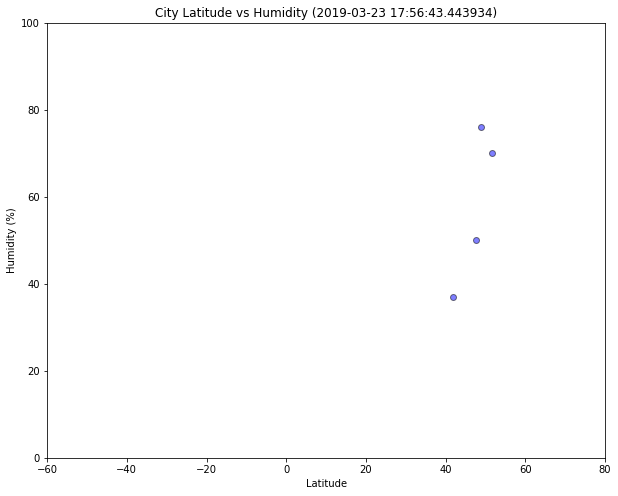

In [86]:
#latitude vs humidity
plt.figure(figsize=(10,8))
plt.scatter(weather_df['Latitude'], weather_df['Humidity'], facecolor='blue', 
            edgecolor='black',
            alpha=.5)

plt.xlim(-60,80)
plt.ylim(0,100)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.datetime.now()})')
plt.grid()
plt.show()
plt.savefig('latvhumidity.png')

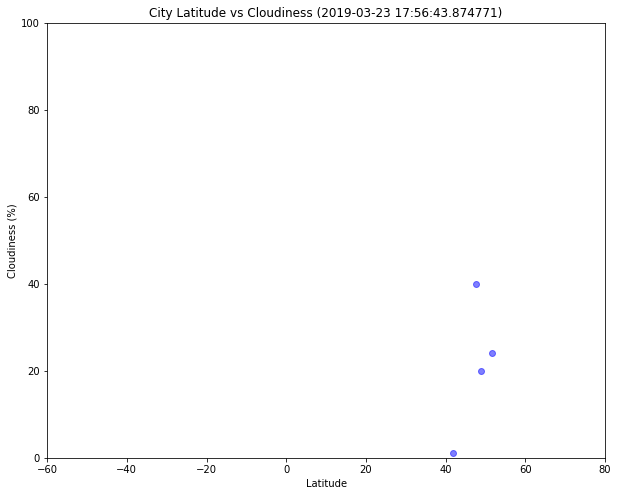

In [87]:
#Latitude vs cloudiness
plt.figure(figsize=(10,8))
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'], color='blue',
            alpha=.5)

plt.xlim(-60,80)
plt.ylim(0,100)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.datetime.now()})')
plt.grid()
plt.show()
plt.savefig('latvcloudiness.png')

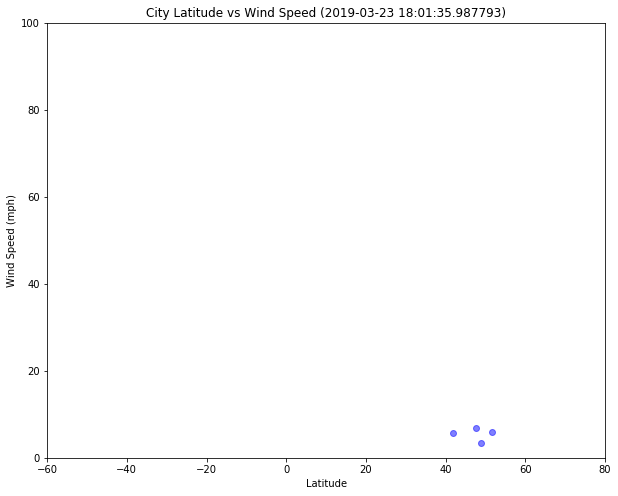

<Figure size 432x288 with 0 Axes>

In [89]:
#latitude vs wind speed
plt.figure(figsize=(10,8))
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'], color='blue',
            alpha=.5)

plt.xlim(-60,80)
plt.ylim(0,100)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.datetime.now()})')
plt.grid()
plt.show()
plt.savefig('latvwindspeed.png')

[2.6, 3.1, 2.57, 1.5]